In [1]:
using Plots,ApproxFun,Interact,Reactive; gadfly();

    writemime(Base.IO, Base.Multimedia.MIME, Reactive.Signal) at /Users/Mikael/.julia/v0.4/Interact/src/IJulia/setup.jl:99
is ambiguous with: 
    writemime(Base.IO, Base.Multimedia.MIME{:text/plain}, Any) at replutil.jl:4.
To fix, define 
    writemime(Base.IO, Base.Multimedia.MIME{:text/plain}, Reactive.Signal)
before the new definition.


# KdV with Neumann $$u_t + 6uu_x + u_{xxx}=0$$

Evaluate the first cell to start the plot, then the second cell to evolve the plot.  Evaluating the second cell will continue evolving the solution.   It may take two times before it works.  

[Plots.jl] Initializing backend: gadfly


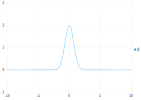

In [2]:
u0=Fun(x->2exp(-x^2),[-10.,10.])
d=domain(u0);D=Derivative(d)
g(y)=-6.y*y'
x=Signal(u0);map(y->plot(y;ylims=(-1.,3.)).o,x)

In [3]:
u0=BDF2([neumann(d);rdirichlet(d)],-D^3,g,zeros(3),u0,0.004,300,x,10E-7);

# KS with periodic boundary conditions $$u_t + uu_x + u_{xx} + u_{xxxx}=0$$

[Plots.jl] Initializing backend: gadfly


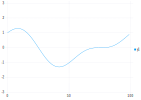

In [2]:
u0,t=Fun(x->cos(x/16)*(1+sin(x/16)),Fourier([0.,32π])),0.0
d=domain(u0);D=Derivative(d)
L = -D^2-D^4
N(u,t) = -u*u'
x=Signal(u0);map(y->plot(y;xlims=(0,32π),ylims=(-3.,3.)).o,x)

In [3]:
u0,t=ETDRK4(L,N,u0,t,0.1,300,x,1e-8);

# Burgers with periodic boundary conditions $$u_t + uu_x - \epsilon u_{xx}=0$$

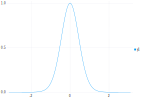

In [4]:
ϵ=0.03;
u0,t=Fun(x->exp(-10sin(x/2)^2),Fourier()),0.0
d=domain(u0);D=Derivative(d)
L = ϵ*D^2
N(u,t) = -u*u'
x=Signal(u0);map(y->plot(y;xlims=(-π,π),ylims=(0.,1.)).o,x)

In [ ]:
u0,t=ETDRK4(L,N,u0,t,0.01,100,x,1e-8);